<a href="https://colab.research.google.com/github/anushabhuchupalli/ML-lab/blob/main/Lasso_regreesion_on_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
df=pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        49 non-null     float64
 1   Administration   49 non-null     float64
 2   Marketing Spend  49 non-null     float64
 3   Profit           49 non-null     float64
 4   State            49 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.3 KB


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

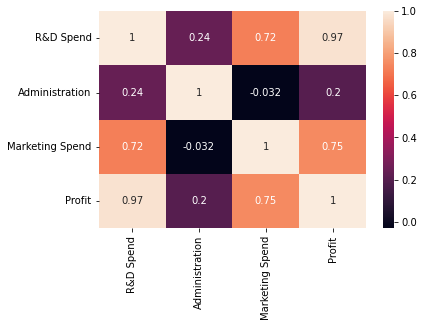

In [5]:
#finding correlation
sns.heatmap(df.corr(),annot = True )
plt.show()


<Axes: >

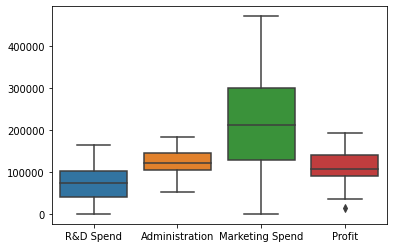

In [6]:
#outliers
import seaborn as sns
sns.boxplot(df)

In [8]:
q1 = df["Profit"].quantile(0.25)
q3 = df["Profit"].quantile(0.75)
iqr=q3-q1
print(iqr)

49627.07499999998


In [10]:
up=q3+1.5*iqr
down=q1-1.5*iqr

print(up,down)


214206.58999999997 15698.290000000023


In [11]:
#removing outliers
df= df[(df["Profit"] >down) & (df["Profit"] < up)]


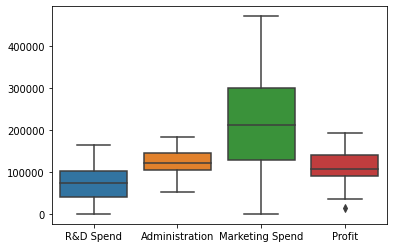

In [9]:
sns.boxplot(df)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x= labelencoder.fit_transform(df['State'])
x=x.reshape(-1,1)


In [13]:
df=df.drop('State',axis=1)

In [14]:
df["State"] =x

In [15]:
X=df.drop('Profit',axis=1)
y=df['Profit'].values
X.shape

(49, 4)

In [16]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [17]:
X.shape

(49, 4)

In [18]:
y=y.reshape(-1,1)
y.shape

(49, 1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
     


In [20]:
#Fitting a lasso regression model
from sklearn.linear_model import Lasso
reg=Lasso(alpha=0.1)
reg.fit(X_train,y_train)


Lasso(alpha=0.1)

In [21]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')
     


Performance of the model on training data :

MAE = 5698.012243362573
MSE = 52359105.44720392
RMSE = 7235.959193306988
R_2 = 0.9656417276092912


In [22]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred2 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')
     


Performance of the model on test data :

MAE = 6892.780304001088
MSE = 70495219.36718847
RMSE = 8396.143124505947
R_2 = 0.9339954988527923
